## Problem Definition and Context

YouTube (the world-famous video sharing website) maintains a list of the top trending videos on the platform. To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes).


This dataset includes several months (and counting) of data on daily trending YouTube videos. Data is included for the US, CA, and GB regions, with up to 200 listed trending videos per day.

Each region’s data is in a separate file. Data includes the video title, channel title, publish time, tags, views, likes and dislikes, description, and comment count.

## What analysis is to be performed? 

#### First, join the 3 datasets and create an extra column of Country to distinguish the data.

#### Random Forest can then be used to create the classification model. Choose 80% Data randomly from dataset to train the model. Use rest to test and validate the model and test the accuracy. Remove the columns which are not useful for prediction.

#### Use of Random Forest to classify the model 

##### Proper Training, testing and Validation 

In [37]:
import pandas as pd

# CA dataset

In [38]:
df_CA = pd.read_csv('CAvideos.csv')

In [39]:
df_CA.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [40]:
df_CA.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [11]:
df_CA.shape

(40881, 16)

In [41]:
# create a Country column for CAvideos
df_CA['Country'] = 1

# US dataset

In [42]:
df_US = pd.read_csv('USvideos.csv')

In [43]:
df_US.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [44]:
df_US.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [45]:
df_US.shape

(40949, 16)

In [46]:
# create a Country column for USvideos
df_US['Country'] = 2

# GB dataset

In [47]:
df_GB = pd.read_csv('GBvideos.csv')

In [48]:
df_GB.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [49]:
df_GB.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


In [50]:
# create a Country column for GBvideos
df_GB['Country'] = 3

## Merge 3 datasets

In [51]:
#join the 3 datasets
data = pd.concat([df_CA,df_US,df_GB])

In [52]:
data.shape

(120746, 17)

In [53]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,1
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,1
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,1
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,1
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,1


In [54]:
data['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30])

### Random forest

In [55]:
#select columns category_id,views, likes,dislikes,comment_count,Country,clusters
df_rd = data.iloc[:,[4,7,8,9,10,-1]]

In [56]:
df_rd.head()

,category_id,views,likes,dislikes,comment_count,Country
0,10,17158579,787425,43420,125882,1
1,23,1014651,127794,1688,13030,1
2,23,3191434,146035,5339,8181,1
3,24,2095828,132239,1989,17518,1
4,10,33523622,1634130,21082,85067,1


In [57]:
df_rd.isnull().sum()

category_id      0
views            0
likes            0
dislikes         0
comment_count    0
Country          0
dtype: int64

In [58]:
df_rd['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30])

In [60]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=df_rd[['views', 'likes', 'dislikes', 'comment_count', 'Country']]  # Features
y=df_rd['category_id']  # Labels

# Split dataset into training set and test set 80 - 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

y_pred=rfc.predict(X_test)

In [62]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6792546583850931


In [63]:
columns = X.columns

In [64]:
columns

Index(['views', 'likes', 'dislikes', 'comment_count', 'Country'], dtype='object')

In [65]:
feature_imp = pd.Series(rfc.feature_importances_,index=columns).sort_values(ascending=False)
feature_imp

likes            0.262844
comment_count    0.248172
views            0.231725
dislikes         0.230477
Country          0.026782
dtype: float64

No handles with labels found to put in legend.


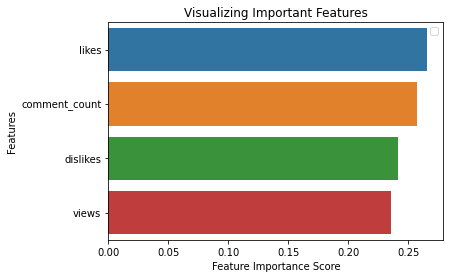

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

#### We can see Likes variable is the most important feature 

## RNN-LSTM-KERAS-NLTK 

#### Create a model using RNN-LSTM-KERAS + NLTK to form a Deep Learning model. Only category ids (as output) and Description (as input text) is to be taken for this model. 

#### Find the Validation Accuracy after dividing the dataset into 80% training and 20% test set. Use 30% dropout to COMBAT OVERFITTING.

In [20]:
#select columns category_id,views, likes,dislikes,comment_count,Country,clusters
df = data.iloc[:,[4,-1]]

In [21]:
df.head()

,category_id,description
0,10,Eminem's new track Walk on Water ft. Beyoncé i...
1,23,STill got a lot of packages. Probably will las...
2,23,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,24,I know it's been a while since we did this sho...
4,10,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [22]:
df.isnull().sum()

category_id       0
description    2478
dtype: int64

In [23]:
df = df.dropna()

In [24]:
df.isnull().sum()

category_id    0
description    0
dtype: int64

In [25]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import numpy as np
from sklearn.model_selection import train_test_split

In [26]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jessicapham/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
df["description"] = df["description"].apply(str)

In [28]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

df['clean_description'] = df['description'].apply(lambda x: clean_text(x))
df.head()

,category_id,description,clean_description
0,10,Eminem's new track Walk on Water ft. Beyoncé i...,"[eminems, new, track, walk, water, ft, beyoncé..."
1,23,STill got a lot of packages. Probably will las...,"[still, got, lot, packages, probably, last, an..."
2,23,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,"[watch, previous, video, nnsubscribe, httpswww..."
3,24,I know it's been a while since we did this sho...,"[know, since, show, back, might, best, episode..."
4,10,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,"[, httpsadgtytperfectn, httpsatlanticrytalbumn..."


In [29]:
data1 = df.drop(columns = ['description'])

In [30]:
# Import Library
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [31]:
# The maximum number of words to be used
MAX_NB_WORDS = 20000
# Max number of words in each sequence
MAX_SEQUENCE_LENGTH = 50

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data1['clean_description'])
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# Convert the data to padded sequences
X = tokenizer.texts_to_sequences(data1['clean_description'])
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

# Encode labels
Y = pd.get_dummies(data1['category_id']).values
print('Shape of label tensor:', Y.shape)

# Splitting into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state = 12)

Found 278812 unique tokens.
Shape of data tensor: (118268, 50)
Shape of label tensor: (118268, 17)


In [32]:
# Construct our basic RNN model framework
model = Sequential()
model.add(Embedding(len(tokenizer.index_word)+1, 32))
model.add(LSTM(32, dropout=0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(17, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          8922016   
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 17)                561       
Total params: 8,931,953
Trainable params: 8,931,953
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Import the tools needed and define functions to calculate precision and recall
import keras.backend as K
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

In [34]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', precision_m, recall_m])

In [35]:
history = model.fit(X_train, Y_train, epochs=5, batch_size=32,validation_data=(X_test, Y_test))

/opt/anaconda3/envs/datamining/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 94614 samples, validate on 23654 samples
Epoch 1/5
94614/94614 [==============================] - 636s 7ms/step - loss: 0.1175 - accuracy: 0.9637 - precision_m: 0.7371 - recall_m: 0.4418 - val_loss: 0.0548 - val_accuracy: 0.9836 - val_precision_m: 0.9352 - val_recall_m: 0.7741
Epoch 2/5
94614/94614 [==============================] - 702s 7ms/step - loss: 0.0438 - accuracy: 0.9868 - precision_m: 0.9391 - recall_m: 0.8287 - val_loss: 0.0330 - val_accuracy: 0.9905 - val_precision_m: 0.9535 - val_recall_m: 0.8822
Epoch 3/5
94614/94614 [==============================] - 701s 7ms/step - loss: 0.0284 - accuracy: 0.9915 - precision_m: 0.9578 - recall_m: 0.8948 - val_loss: 0.0255 - val_accuracy: 0.9929 - val_precision_m: 0.9604 - val_recall_m: 0.9166
Epoch 4/5
94614/94614 [==============================] - 729s 8ms/step - loss: 0.0217 - accuracy: 0.9935 - precision_m: 0.9665 - recall_m: 0.9219 - val_loss: 0.0219 - val_accuracy: 0.9937 - val_precision_m: 0.9658 - val_recall_m: 0.9266
Ep

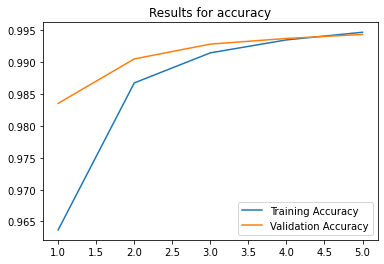

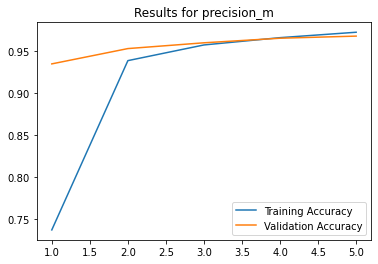

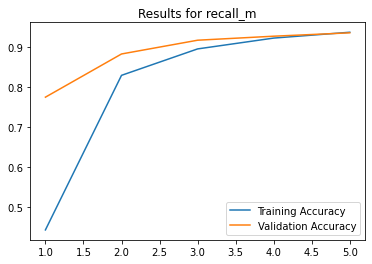

In [36]:
# Plot basic evaluation metrics across epochs
import matplotlib.pyplot as plt
%matplotlib inline

for i in ['accuracy', 'precision_m', 'recall_m']:
    acc = history.history[i]
    val_acc = history.history['val_{}'.format(i)]
    epochs = range(1, len(acc) + 1)

    plt.figure()
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.show()

## COMPARE THE VALIDATION/TEST ACCURACY OF THE 2 MODELS AND BRIEFLY EXPLAIN WHICH ONE COULD BE USED IN WHICH CASE 

The accuracy of RNN-LSTM-KERAS-NLTK model is higher than the accuracy of Random Forest model. 
Random Forest is based on decision tree model. While it is not as sophisticated as RNN, it still can sometimes generate accurate result as our prediction here. The model requires less computation power and you can know which variable is affecting the computation result. Therefore, if you want to know the process, this is possible.
However, the process of RNN is more like a black box. If you want to know what is going on within the model it's often not possible. Also it takes a lot of computation power to process the data.
Random Forest is a technique of Machine Learning while Neural Networks are exclusive to Deep Learning.
Random Forest could be used without requiring a GPU to train the model
Random Forest could be used with less computationally expensive
Random Forest could be used with a large dataset, and interpretability is not a major concern
RNN-LSTM-KERAS-NLTK performs extremely well on sequence-modeling tasks and provide high performance on text-related tasks. So if we have long sequences to work with, this model would be a good choice.
This model is more powerful as it uses more parameters and an explicit cell state.